In [3]:
import pandas as pd

pathLyrics = "./song-lyrics/lyrics-data.csv"
pathArtists = "./song-lyrics/artists-data.csv"

dataframeLyrics = pd.read_csv(pathLyrics)
dataframeArtists = pd.read_csv(pathArtists)

#Only English + lowercase
#TODO: Chordsheets filtern
dataLyricsFilterd = dataframeLyrics[dataframeLyrics['Idiom'] == 'ENGLISH']
#dataLyricsFilterd = dataLyricsFilterd[dataLyricsFilterd['Lyric'] != 'Instrumental']
#dataLyricsFilterd = dataLyricsFilterd[dataLyricsFilterd['Lyric'] != 'Instrumental.']

dataLyricsFilterd = dataLyricsFilterd.apply(lambda x: x.astype(str).str.lower())
dataArtistsFilterd = dataframeArtists.apply(lambda x: x.astype(str).str.lower())
del dataArtistsFilterd['Genres']
del dataArtistsFilterd['Popularity']
del dataArtistsFilterd['Songs']

dataArtistsFilterd = dataArtistsFilterd[dataArtistsFilterd['Genre'] != 'samba']
dataArtistsFilterd = dataArtistsFilterd[dataArtistsFilterd['Genre'] != 'sertanejo']
dataArtistsFilterd = dataArtistsFilterd[dataArtistsFilterd['Genre'] != 'funk carioca']

dataArtistsFilterd = dataArtistsFilterd[dataArtistsFilterd['Artist'] == '10000 maniacs']
#Hier ungewünschte Begriffe einfügen
patternDel = ["---", "instrumental","==="]
for patt in patternDel:
    filter = dataLyricsFilterd['Lyric'].str.contains(patt)
    dataLyricsFilterd = dataLyricsFilterd[~filter]

    
    
    
    
#dataArtistsFilterd
#dataLyricsFilterd.to_csv('filterdData.csv')

dataArtistsFilterd

,Artist,Link,Genre
0,10000 maniacs,/10000-maniacs/,rock
1947,10000 maniacs,/10000-maniacs/,pop


In [4]:
mergedData = pd.merge(dataLyricsFilterd, dataArtistsFilterd, how='inner', left_on='ALink',right_on='Link')
del mergedData['ALink']
del mergedData['SName']
del mergedData['SLink']
del mergedData['Idiom']
del mergedData['Artist']
del mergedData['Link']
mergedData
#mergedData.to_csv('mergedData.csv')

,Lyric,Genre
0,i could feel at the time. there was no way of ...,rock
1,i could feel at the time. there was no way of ...,pop
2,"take me now, baby, here as i am. hold me close...",rock
3,"take me now, baby, here as i am. hold me close...",pop
4,these are. these are days you'll remember. nev...,rock
...,...,...
257,i will twine with your mingles of raven black ...,pop
258,[ music: robert buck/words: natalie merchant ]...,rock
259,[ music: robert buck/words: natalie merchant ]...,pop
260,i'd like to know what makes you stay. while yo...,rock


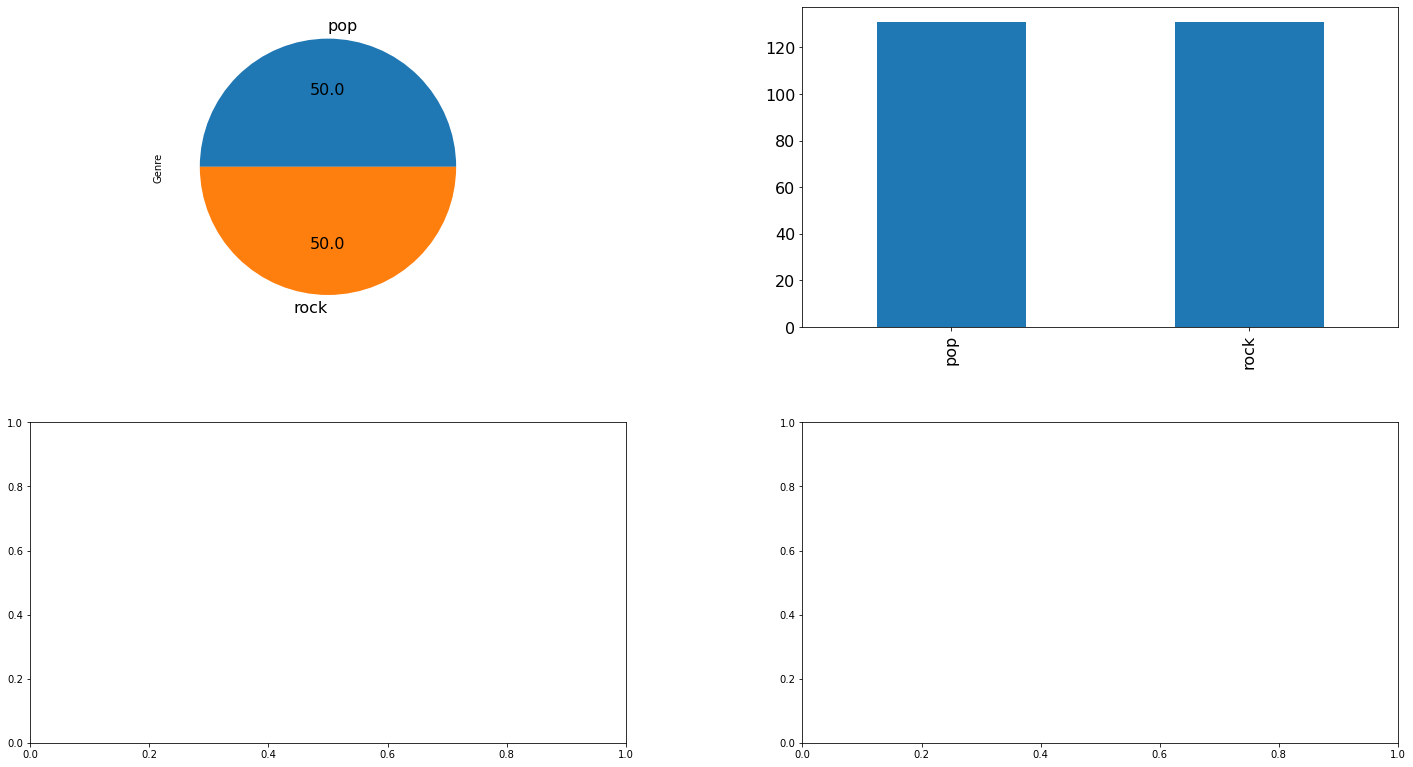

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt


genreCount = mergedData['Genre'].value_counts()

fig, axarr = plt.subplots(2, 2)
fig.tight_layout()


genreCount.plot.pie( figsize=(12, 12), fontsize=16, ax=axarr[0][0] , autopct='%.1f' )
genreCount.plot.bar( figsize=(22, 12), fontsize=16, ax=axarr[0][1] )



In [6]:
from collections import Counter 
word_index = Counter(" ".join(mergedData["Lyric"]).split()).most_common(10000)

word_index

[('the', 2414),
 ('a', 1300),
 ('and', 1176),
 ('to', 1094),
 ('i', 964),
 ('in', 886),
 ('you', 814),
 ('of', 766),
 ('for', 488),
 ('that', 476),
 ('your', 428),
 ('is', 424),
 ('my', 420),
 ('on', 358),
 ('with', 350),
 ('it', 318),
 ('was', 302),
 ('me', 296),
 ('as', 276),
 ('but', 252),
 ('so', 232),
 ('be', 228),
 ('they', 222),
 ('we', 218),
 ('from', 216),
 ('all', 214),
 ("don't", 208),
 ('when', 182),
 ('he', 182),
 ('if', 176),
 ('no', 172),
 ('by', 168),
 ('like', 162),
 ('will', 158),
 ('their', 156),
 ('this', 156),
 ('her', 156),
 ('can', 154),
 ('how', 154),
 ('know', 148),
 ("i'm", 142),
 ('never', 140),
 ('where', 138),
 ('not', 138),
 ('there', 132),
 ("it's", 132),
 ('his', 132),
 ('love', 130),
 ('some', 128),
 ('she', 128),
 ('take', 126),
 ('are', 126),
 ('just', 126),
 ('what', 122),
 ('could', 116),
 ('at', 116),
 ('time', 114),
 ('were', 114),
 ("there's", 110),
 ('one', 110),
 ('have', 110),
 ('see', 110),
 ('now', 106),
 ('or', 104),
 ("you'll", 100),
 ('yo

In [ ]:
most_commonn = set([t[0] for t in word_index])
occurrences = []
for lyric in mergedData['Lyric']:
    #internalCounter = Counter(" ".join(mergedData["Lyric"]).split()).lyric(10000)
    internal_counter = Counter(lyric.split())
    #print(internal_counter)
    #print(dict(zip(internal_counter[::2], internal_counter[1::2])))
    #print(lyric)
    
    #print(most_commonn)
    #clean_text = dict(collections.Counter([tok.lower() for tok in tokenized_text if tok not in punctuation and tok not in stopwords]))
    #occurrences.append({internal_counter[c] for c in most_commonn})
    for c in most_commonn:
        occurrences.append(internal_counter[c])
    
    #print(occurrences)   
newThingy = pd.DataFrame(occurrences)
newThingy.to_csv('test.csv')
    #newThingy